# Measurement Problems

## Sorting Reviews

### Up-Down Difference Score

In [1]:
# libraries

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import math
import matplotlib.pyplot as plt

# measurement methods
from sklearn.preprocessing import MinMaxScaler

In [2]:
def score_up_down(up_rate, down_rate):
    
    return (up_rate - down_rate)

In [3]:
print(score_up_down(600,400))
print(score_up_down(5500,4500))

200
1000


This method does not emphasize on percentage, therefore it is not very convenient to use.

In [4]:
def score_average_rating(up_rate, down_rate):
    
    all_rates = up_rate + down_rate
    
    if all_rates == 0:
        return 0
    
    return up_rate/all_rates

In [5]:
print(score_average_rating(600,400))
print(score_average_rating(5500,4500))

0.6
0.55


This way we can have percentages. Comparing with ratio always gives better insight.However, frequency fails here. Therefore, another these approaches are not efficient to use since they are missing some frequency information. One should use a method which includes insgihts with *percentage*,*ratio* and *frequency*.

## Wilson Lower Bound Score

A method for sorting a product according to positive and negative reviews is provided by the lower bound of the Wilson score confidence interval for a **Bernoulli parameter**. The aim is to use the current set of user ratings as a statistical sample of a fictitious collection of user ratings from all users.

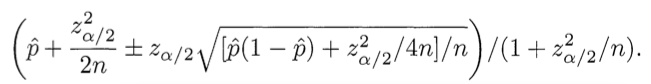

In [6]:
def wilson_lower_bound(up,down,confidence = 0.95):
    
    n = up + down
    
    if n == 0:
        return 0
    
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * up / n
    
    return (phat + z * z / (2*n) - z * math.sqrt((phat * (1- phat) + z * z / (4*n)) / n)) / (1 + z * z/n)

In [7]:
print(wilson_lower_bound(600,400))
print(wilson_lower_bound(5500,4500))

0.5693094295142663
0.5402319557715324


# Case Study

In [11]:
up = [15,70,14,4,2,5,8,37,21,52,28,147,61,30,23,40,37,61,54,18,12,68]
down= [0,2,2,2,15,2,6,5,23,8,12,2,1,1,5,1,2,6,2,0,2,2]
comments = pd.DataFrame({"up":up,
            "down":down})

comments

,up,down
0,15,0
1,70,2
2,14,2
3,4,2
4,2,15
5,5,2
6,8,6
7,37,5
8,21,23
9,52,8


In [12]:
# score pos neg diff
comments["score_pos_neg_diff"] = comments.apply(lambda x: score_up_down(x["up"],x["down"]), axis=1)

# average score
comments["score_average_rating"] = comments.apply(lambda x: score_average_rating(x["up"],x["down"]), axis = 1)

# wilson lower bound
comments["score_wilson_lower"] = comments.apply(lambda x: wilson_lower_bound(x["up"],x["down"]), axis=1)

In [13]:
comments

,up,down,score_pos_neg_diff,score_average_rating,score_wilson_lower
0,15,0,15,1.000000,0.796117
1,70,2,68,0.972222,0.904258
2,14,2,12,0.875000,0.639772
3,4,2,2,0.666667,0.299993
4,2,15,-13,0.117647,0.032880
5,5,2,3,0.714286,0.358934
6,8,6,2,0.571429,0.325906
7,37,5,32,0.880952,0.749996
8,21,23,-2,0.477273,0.337550
9,52,8,44,0.866667,0.758348


In [14]:
comments.sort_values("score_wilson_lower", ascending=False)

,up,down,score_pos_neg_diff,score_average_rating,score_wilson_lower
11,147,2,145,0.986577,0.952384
12,61,1,60,0.983871,0.914133
1,70,2,68,0.972222,0.904258
21,68,2,66,0.971429,0.901677
18,54,2,52,0.964286,0.878812
15,40,1,39,0.975610,0.874049
13,30,1,29,0.967742,0.838059
16,37,2,35,0.948718,0.831144
19,18,0,18,1.000000,0.824121
17,61,6,55,0.910448,0.818072
